# Data Pre Processing 

In [510]:
import pandas as pd
import numpy as np

In [511]:
#read data from data sets 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
#combine all the read data sets
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [512]:
#add column names into the data set
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [513]:
#check unique values in the data set 
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

HCHO reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


Next Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']



## Categorize the data according to the different cities and clean the data 

In here data the main data frame will break into small data frames according to the cities. After that remove the unnecessary columns and make the Next date column as index in the dataframe.

In [514]:
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [515]:
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [516]:
#remove Next Date column 
colombo_df= colombo_df.drop(columns=['Next Date'])
#Current date column data type covert into Date time.
colombo_df["Current Date"] = pd.to_datetime(colombo_df["Current Date"])
#Make that Current date column as index in the data frame 
colombo_df.set_index("Current Date", inplace=True)

In [517]:
jaffna_df

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [518]:
jaffna_df= jaffna_df.drop(columns=['Next Date'])
jaffna_df["Current Date"] = pd.to_datetime(jaffna_df["Current Date"])
jaffna_df.set_index("Current Date", inplace=True)

In [519]:
deniyaya_df

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
3648,NaN,"Deniyaya, Matara",2023-12-28,2023-12-29
3649,NaN,"Deniyaya, Matara",2023-12-29,2023-12-30
3650,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [520]:
deniyaya_df= deniyaya_df.drop(columns=['Next Date'])
deniyaya_df["Current Date"] = pd.to_datetime(deniyaya_df["Current Date"])
deniyaya_df.set_index("Current Date", inplace=True)

In [521]:
nuwaraEliya_df

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [522]:
nuwaraEliya_df= nuwaraEliya_df.drop(columns=['Next Date'])
nuwaraEliya_df["Current Date"] = pd.to_datetime(nuwaraEliya_df["Current Date"])
nuwaraEliya_df.set_index("Current Date", inplace=True)

In [523]:
kandy_df

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [524]:
kandy_df= kandy_df.drop(columns=['Next Date'])
kandy_df["Current Date"] = pd.to_datetime(kandy_df["Current Date"])
kandy_df.set_index("Current Date", inplace=True)

In [525]:
bibile_df

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,"Bibile, Monaragala",2023-12-27,2023-12-28
1822,NaN,"Bibile, Monaragala",2023-12-28,2023-12-29
1823,NaN,"Bibile, Monaragala",2023-12-29,2023-12-30
1824,NaN,"Bibile, Monaragala",2023-12-30,2023-12-31


In [526]:
bibile_df= bibile_df.drop(columns=['Next Date'])
bibile_df["Current Date"] = pd.to_datetime(bibile_df["Current Date"])
bibile_df.set_index("Current Date", inplace=True)

In [527]:
kurunegala_df

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
3648,NaN,Kurunegala Proper,2023-12-28,2023-12-29
3649,NaN,Kurunegala Proper,2023-12-29,2023-12-30
3650,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [528]:
kurunegala_df= kurunegala_df.drop(columns=['Next Date'])
kurunegala_df["Current Date"] = pd.to_datetime(kurunegala_df["Current Date"])
kurunegala_df.set_index("Current Date", inplace=True)

### Missing Values Handling 

In here, check all the dataframes one by one and count all the missing values and fill those missing values using backward forward filling.

In [529]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
dtype: int64

In [530]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

In [531]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [532]:
jaffna_df.isnull().sum()

HCHO reading    365
Location          0
dtype: int64

In [533]:
jaffna_mode_value = jaffna_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)

In [534]:
jaffna_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [535]:
kandy_df.isnull().sum()

HCHO reading    793
Location          0
dtype: int64

In [536]:
kandy_mode_value = kandy_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)

In [537]:
kandy_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [538]:
nuwaraEliya_df.isnull().sum()

HCHO reading    1085
Location           0
dtype: int64

In [539]:
nuwaraEliya_mode_value = nuwaraEliya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)

In [540]:
nuwaraEliya_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [541]:
bibile_df.isnull().sum()

HCHO reading    695
Location          0
dtype: int64

In [542]:
bibille_mode_value = bibile_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)

In [543]:
bibile_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [544]:
deniyaya_df.isnull().sum()

HCHO reading    847
Location          0
dtype: int64

In [545]:
deniyaya_mode_value =deniyaya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)

In [546]:
deniyaya_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [547]:
kurunegala_df.isnull().sum()

HCHO reading    592
Location          0
dtype: int64

In [548]:
kurunegala_mode_value =kurunegala_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)

In [549]:
kurunegala_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

### Outliers Handling 

In here, box plot all the dataframes data values one by one and using IQR method to handle the outliers.

In [550]:
import matplotlib.pyplot as plt

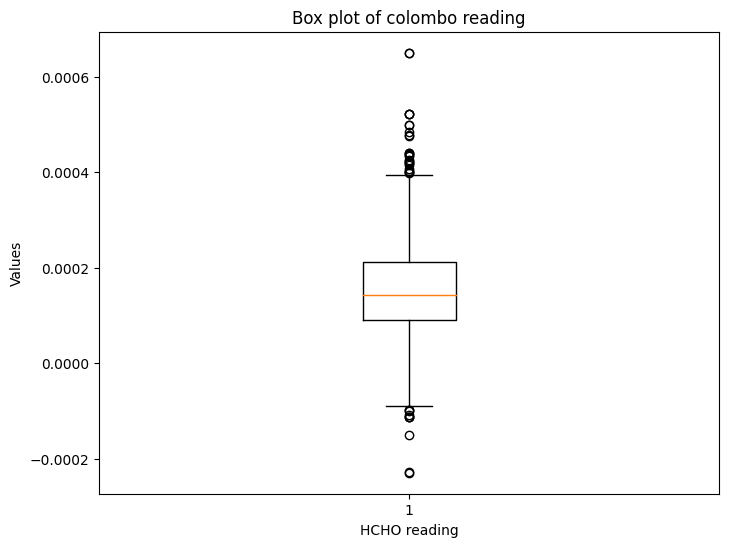

In [551]:
#Box plot data HCHO values in Colombo data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [552]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = colombo_df['HCHO reading'].quantile(0.25)
Q3 = colombo_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = colombo_df['HCHO reading'][colombo_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = colombo_df['HCHO reading'][colombo_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003934967004419
Lower bound within the boxplot: -8.888445964777543e-05


In [553]:
upper_count_colombo = colombo_df[colombo_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_colombo = colombo_df[colombo_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in colombo_df:", upper_count_colombo)
print("Number of values lower than lower bound data in colombo_df:", lower_count_colombo)

Number of values greater than upper bound data in colombo_df: 26
Number of values lower than lower bound data in colombo_df: 10


In [554]:
colombo_df = colombo_df.drop(colombo_df[(colombo_df['HCHO reading'] >= upper_bound_data)].index)
colombo_df= colombo_df.drop(colombo_df[(colombo_df["HCHO reading"] <= lower_bound_data)].index)

In [555]:
# Apply winsorization to the remaining outliers
colombo_df['HCHO reading'] = np.where(colombo_df['HCHO reading'] > upper_bound_data, upper_whisker, colombo_df['HCHO reading'])
colombo_df['HCHO reading'] = np.where(colombo_df['HCHO reading'] < lower_bound_data, lower_whisker, colombo_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = colombo_df[(colombo_df['HCHO reading'] > upper_whisker) | (colombo_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


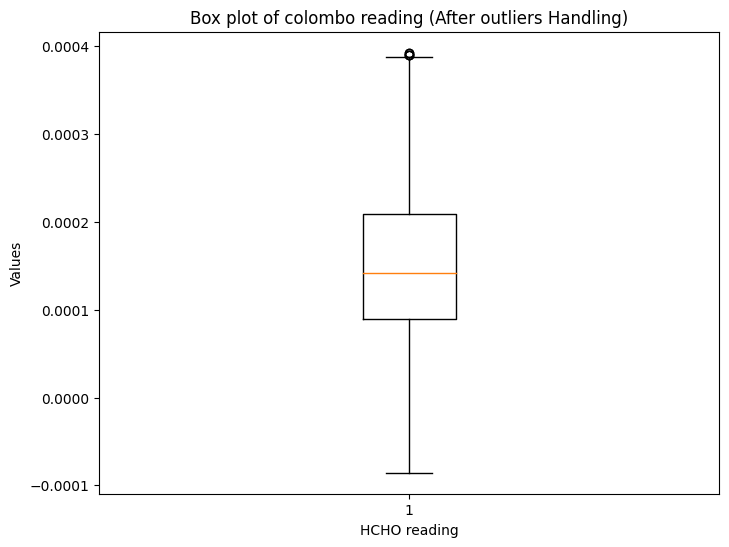

In [556]:
#Box plot data HCHO values in Colombo data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading (After outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

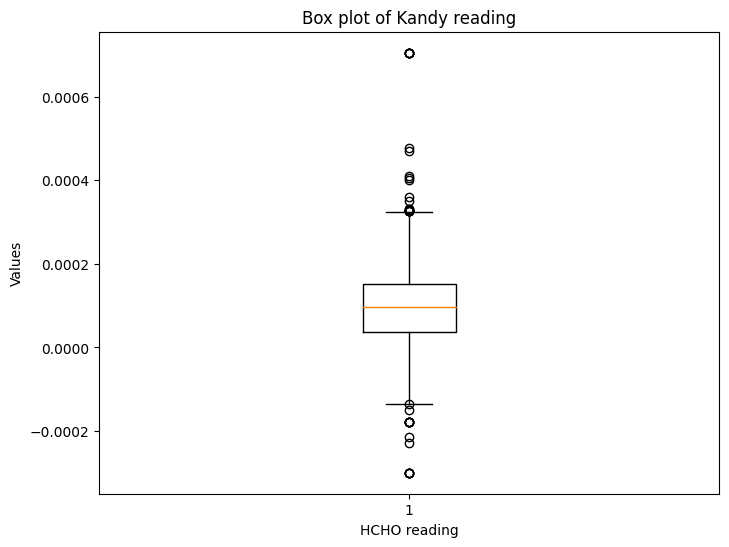

In [557]:
#Box plot kandy dataframe HCHO values 
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [558]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = kandy_df['HCHO reading'].quantile(0.25)
Q3 = kandy_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = kandy_df['HCHO reading'][kandy_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = kandy_df['HCHO reading'][kandy_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003232150559895
Lower bound within the boxplot: -0.0001341463357675


In [559]:
upper_count_kandy = kandy_df[kandy_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_kandy = kandy_df[kandy_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in kandy_df:", upper_count_kandy)
print("Number of values lower than lower bound data in kandy_df:", lower_count_kandy)

Number of values greater than upper bound data in kandy_df: 23
Number of values lower than lower bound data in kandy_df: 15


In [560]:
kandy_df = kandy_df.drop(kandy_df[(kandy_df['HCHO reading'] >= upper_bound_data)].index)
kandy_df= kandy_df.drop(kandy_df[(kandy_df["HCHO reading"] <= lower_bound_data)].index)

In [561]:
# Apply winsorization to the remaining outliers
kandy_df['HCHO reading'] = np.where(kandy_df['HCHO reading'] > upper_bound_data, upper_whisker, kandy_df['HCHO reading'])
kandy_df['HCHO reading'] = np.where(kandy_df['HCHO reading'] < lower_bound_data, lower_whisker, kandy_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = kandy_df[(kandy_df['HCHO reading'] > upper_whisker) | (kandy_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


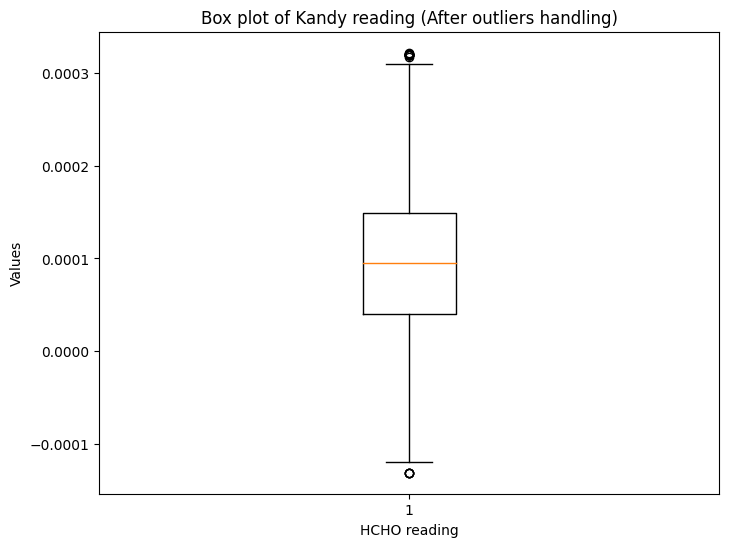

In [562]:
#Box plot kandy dataframe HCHO values 
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

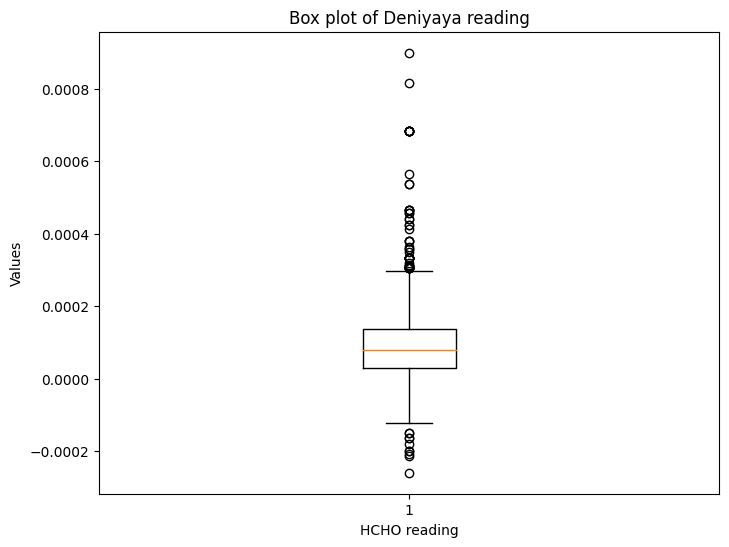

In [563]:
#Box plot HCHO values in Deniyaya dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [564]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = deniyaya_df['HCHO reading'].quantile(0.25)
Q3 = deniyaya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = deniyaya_df['HCHO reading'][deniyaya_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = deniyaya_df["HCHO reading"][deniyaya_df["HCHO reading"] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002964527594232
Lower bound within the boxplot: -0.0001226669264724


In [565]:
upper_count = deniyaya_df[deniyaya_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count = deniyaya_df[deniyaya_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data:", upper_count)
print("Number of values lower than upper bound data:", lower_count)

Number of values greater than upper bound data: 50
Number of values lower than upper bound data: 10


In [566]:
deniyaya_df = deniyaya_df.drop(deniyaya_df[(deniyaya_df['HCHO reading'] >= upper_bound_data)].index)
deniyaya_df= deniyaya_df.drop(deniyaya_df[(deniyaya_df["HCHO reading"] <= lower_bound_data)].index)

In [567]:
# Apply winsorization to the remaining outliers
deniyaya_df['HCHO reading'] = np.where(deniyaya_df['HCHO reading'] > upper_bound_data, upper_whisker, deniyaya_df['HCHO reading'])
deniyaya_df['HCHO reading'] = np.where(deniyaya_df['HCHO reading'] < lower_bound_data, lower_whisker, deniyaya_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = deniyaya_df[(deniyaya_df['HCHO reading'] > upper_whisker) | (deniyaya_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


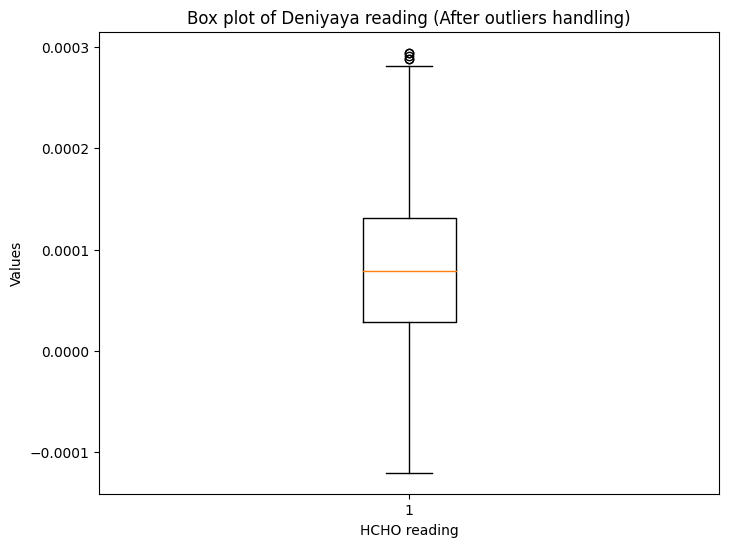

In [568]:
#Box plot HCHO values in Deniyaya dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

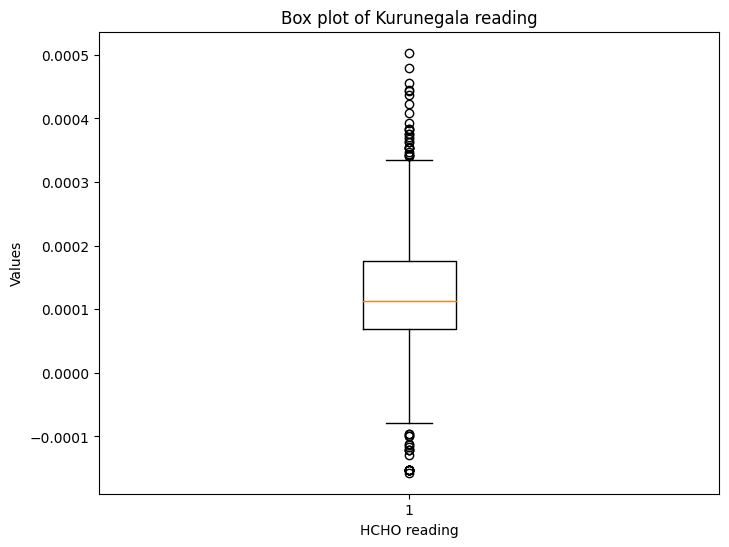

In [569]:
#Box plot HCHO values in Kurunegala dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [570]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = kurunegala_df['HCHO reading'].quantile(0.25)
Q3 = kurunegala_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = kurunegala_df['HCHO reading'][kurunegala_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = kurunegala_df["HCHO reading"][kurunegala_df["HCHO reading"] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0003348459427343
Lower bound within the boxplot: -7.817408913979307e-05


In [571]:
upper_count_kurunegala = kurunegala_df[kurunegala_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_kurunegala = kurunegala_df[kurunegala_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in kurunegala_df:", upper_count_kurunegala)
print("Number of values lower than lower bound data in kurunegala_df:", lower_count_kurunegala)

Number of values greater than upper bound data in kurunegala_df: 27
Number of values lower than lower bound data in kurunegala_df: 21


In [572]:
kurunegala_df = kurunegala_df.drop(kurunegala_df[(kurunegala_df["HCHO reading"] >= upper_bound_data)].index)
kurunegala_df = kurunegala_df.drop(kurunegala_df[(kurunegala_df["HCHO reading"] <= lower_bound_data)].index)

In [573]:
# Apply winsorization to the remaining outliers
kurunegala_df['HCHO reading'] = np.where(kurunegala_df['HCHO reading'] > upper_bound_data, upper_whisker, kurunegala_df['HCHO reading'])
kurunegala_df['HCHO reading'] = np.where(kurunegala_df['HCHO reading'] < lower_bound_data, lower_whisker, kurunegala_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = kurunegala_df[(kurunegala_df['HCHO reading'] > upper_whisker) | (kurunegala_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


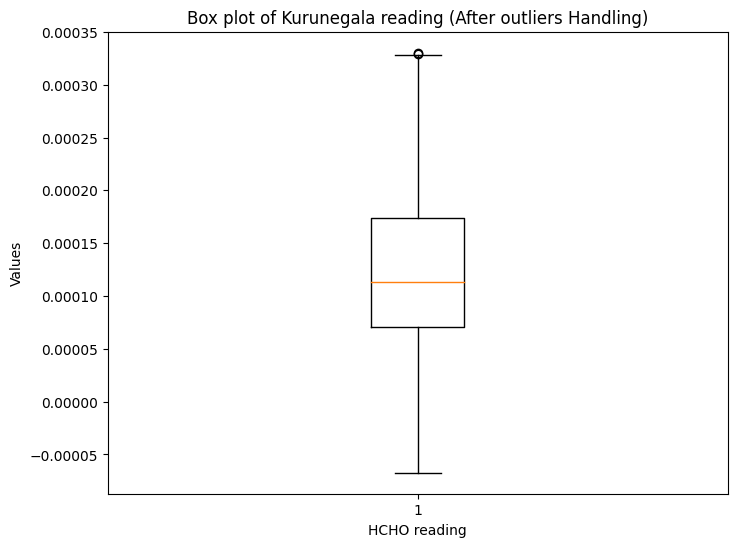

In [574]:
#Box plot HCHO values in Kurunegala dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading (After outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

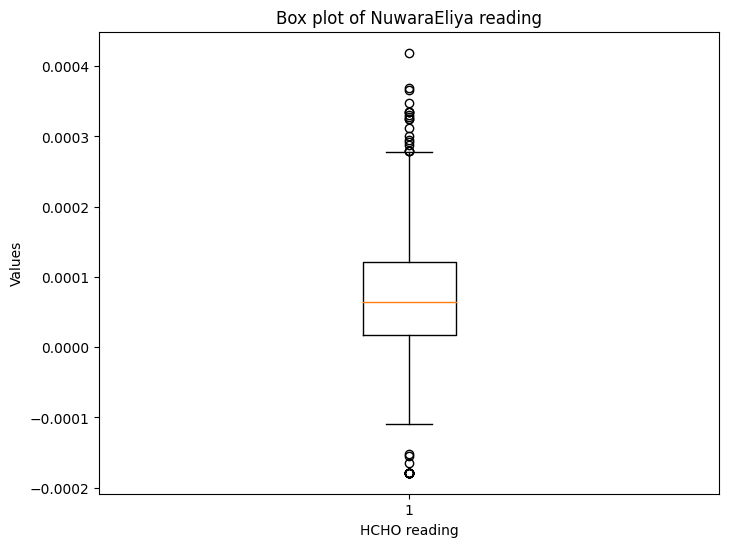

In [575]:
#Box plot HCHO values in the Nuwara eliya Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [576]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = nuwaraEliya_df['HCHO reading'].quantile(0.25)
Q3 = nuwaraEliya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = nuwaraEliya_df['HCHO reading'][nuwaraEliya_df['HCHO reading'] <= upper_whisker].max()
lower_bound_data = nuwaraEliya_df["HCHO reading"][nuwaraEliya_df["HCHO reading"]>= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002771661984116
Lower bound within the boxplot: -0.0001089299252098


In [577]:
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] >= upper_bound_data)].index)
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] <= lower_bound_data)].index)

In [578]:
# Apply winsorization to the remaining outliers
nuwaraEliya_df['HCHO reading'] = np.where(nuwaraEliya_df['HCHO reading'] > upper_bound_data, upper_whisker, nuwaraEliya_df['HCHO reading'])
nuwaraEliya_df['HCHO reading'] = np.where(nuwaraEliya_df['HCHO reading'] < lower_bound_data, lower_whisker, nuwaraEliya_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] > upper_whisker) | (nuwaraEliya_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


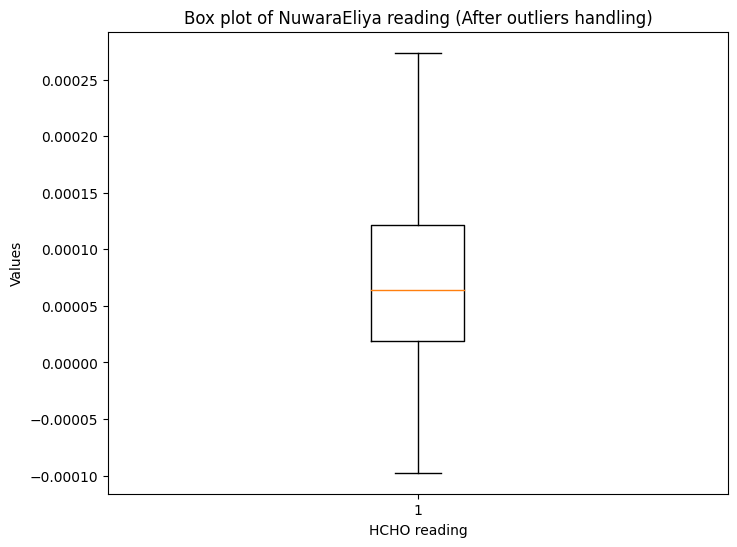

In [579]:
#Box plot HCHO values in the Nuwara eliya Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading (After outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

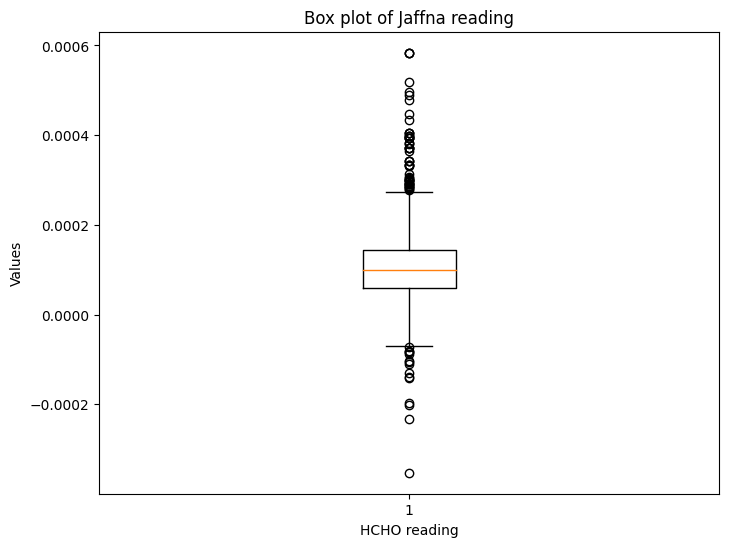

In [580]:
#Box plot HCHO reading values in Jaffna Dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [581]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = jaffna_df['HCHO reading'].quantile(0.25)
Q3 = jaffna_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002729933174109
Lower bound within the boxplot: -6.91114370543075e-05


In [582]:
upper_count_jaffna = jaffna_df[jaffna_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_jaffna = jaffna_df[jaffna_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in jaffna_df:", upper_count_jaffna)
print("Number of values lower than lower bound data in jaffna_df:", lower_count_jaffna)

Number of values greater than upper bound data in jaffna_df: 55
Number of values lower than lower bound data in jaffna_df: 15


In [583]:
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] >= upper_bound_data)].index)
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] <= lower_bound_data)].index)

In [584]:
# Apply winsorization to the remaining outliers
jaffna_df['HCHO reading'] = np.where(jaffna_df['HCHO reading'] > upper_bound_data, upper_whisker, jaffna_df['HCHO reading'])
jaffna_df['HCHO reading'] = np.where(jaffna_df['HCHO reading'] < lower_bound_data, lower_whisker, jaffna_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = jaffna_df[(jaffna_df['HCHO reading'] > upper_whisker) | (jaffna_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


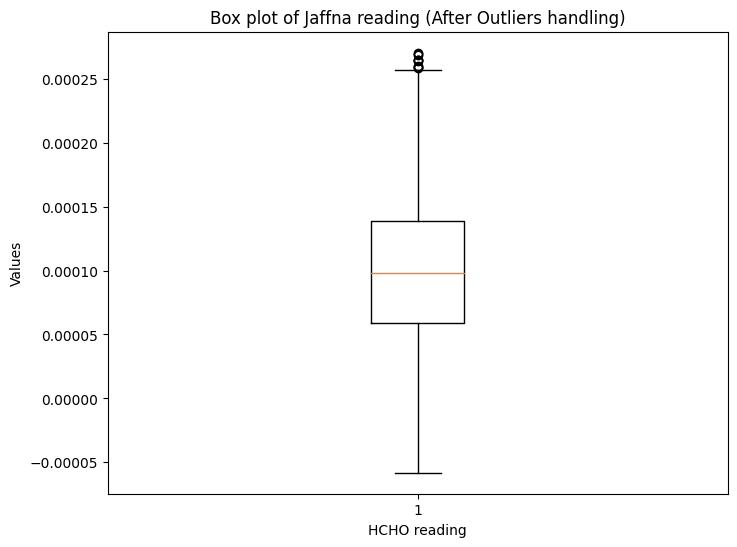

In [585]:
#Box plot HCHO reading vlaues in Jaffna Data frame 
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading (After Outliers handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

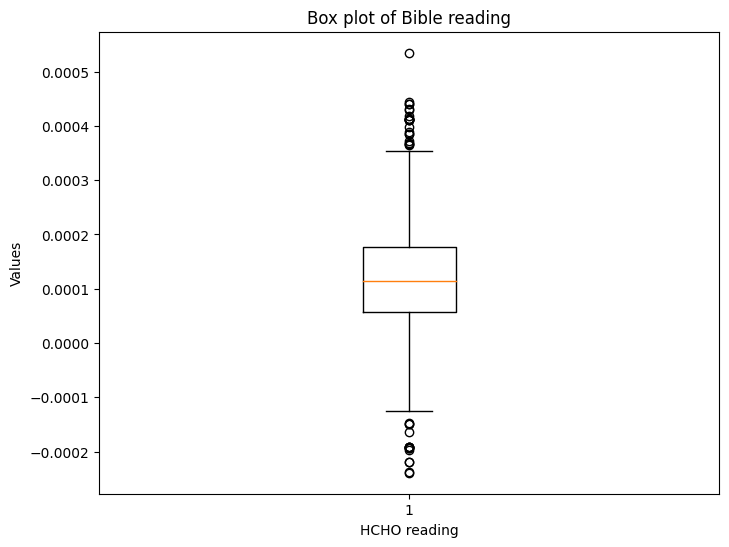

In [586]:
#Box plot HCHO reading values in bibile dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [587]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = bibile_df['HCHO reading'].quantile(0.25)
Q3 = bibile_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = bibile_df['HCHO reading'][bibile_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = bibile_df['HCHO reading'][bibile_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.000354432924956
Lower bound within the boxplot: -0.0001246291509994


In [588]:
upper_count_bibile = bibile_df[bibile_df['HCHO reading'] > upper_bound_data]['HCHO reading'].count()
lower_count_bibile = bibile_df[bibile_df['HCHO reading'] < lower_bound_data]['HCHO reading'].count()
print("Number of values greater than upper bound data in bibile_df:", upper_count_bibile)
print("Number of values lower than lower bound data in bibile_df:", lower_count_bibile)

Number of values greater than upper bound data in bibile_df: 23
Number of values lower than lower bound data in bibile_df: 16


In [589]:
bibile_df = bibile_df.drop(bibile_df[(bibile_df['HCHO reading'] >= upper_bound_data)].index)
bibile_df = bibile_df.drop(bibile_df[(bibile_df['HCHO reading'] <= lower_bound_data)].index)

In [590]:
# Apply winsorization to the remaining outliers
bibile_df['HCHO reading'] = np.where(bibile_df['HCHO reading'] > upper_bound_data, upper_whisker, bibile_df['HCHO reading'])
bibile_df['HCHO reading'] = np.where(bibile_df['HCHO reading'] < lower_bound_data, lower_whisker, bibile_df['HCHO reading'])

# Check if there are any outliers remaining after winsorization
remaining_outliers = bibile_df[(bibile_df['HCHO reading'] > upper_whisker) | (bibile_df['HCHO reading'] < lower_whisker)]

if not remaining_outliers.empty:
    print("There are still outliers remaining after winsorization.")
else:
    print("All outliers have been successfully winsorized.")

All outliers have been successfully winsorized.


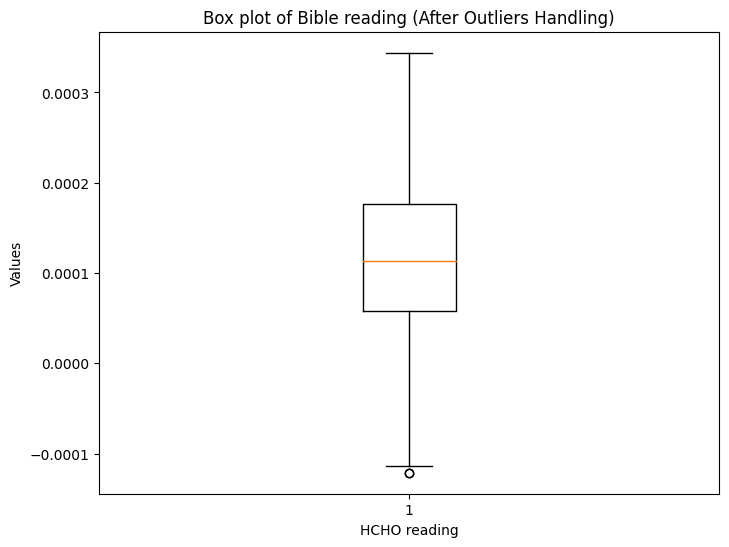

In [591]:
#Box plot HCHO reading values in bibile dataframe
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading (After Outliers Handling)')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

### Covert Dataframes into Stationary

In [592]:
from statsmodels.tsa.stattools import adfuller

In [593]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -3.672389
p-value: 0.004519
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [594]:
result = adfuller(kandy_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -15.255191
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
The dataframe is stationary


In [595]:
result = adfuller(bibile_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -5.884802
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
3.0191693729003726e-07
The dataframe is stationary


In [596]:
result = adfuller(kurunegala_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("the The dataframe is stationary")
    

ADF Statistic: -8.230063
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
6.096959688449554e-13
the The dataframe is stationary


In [597]:
result = adfuller(jaffna_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -6.803297
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
2.2089226206230444e-09
The dataframe is stationary


In [598]:
result = adfuller(nuwaraEliya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -8.594701
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
7.12947193632331e-14
The dataframe is stationary


In [599]:
result = adfuller(deniyaya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

ADF Statistic: -12.521109
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568
2.547267255315699e-23
The dataframe is stationary


### Save Pre-Processed Data

In [601]:
colombo_df.to_csv("DataSets/ColomboData.csv")
kandy_df.to_csv("DataSets/KandyData.csv")
nuwaraEliya_df.to_csv("DataSets/NuwaraEliyData.csv")
bibile_df.to_csv("DataSets/BibileData.csv")
kurunegala_df.to_csv("DataSets/KurunegalaData.csv")
jaffna_df.to_csv("DataSets/JaffnaData.csv")
deniyaya_df.to_csv("DataSets/DeniyayaData.csv")

In [491]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [492]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(colombo_df) * split_ratio)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

RMSE: 0.00010004448798718372
MSE: 1.0008899576617748e-08
MAPE: 146.19576770108415


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encounte

In [493]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(nuwaraEliya_df) * split_ratio)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 9.524595435704805e-05
MSE: 9.07179182138488e-09
MAPE: 107.74464741544894


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [494]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(deniyaya_df) * split_ratio)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

RMSE: 7.804737698307264e-05
MSE: 6.091393053937857e-09
MAPE: 2158.9845495430914


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported inde

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1428
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11534.614
Date:                Wed, 17 Apr 2024   AIC                         -23065.229
Time:                        21:27:17   BIC                         -23054.702
Sample:                             0   HQIC                        -23061.297
                               - 1428                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3165    1.9e-19  -1.66e+18      0.000      -0.317      -0.317
sigma2      5.579e-09   1.52e-10     36.608      0.000    5.28e-09    5.88e-09
Ljung-Box (L1) (Q):                   6.14   Jarque-

0       0.000000
1       0.000176
2       0.000119
3       0.000160
4       0.000191
          ...   
1796    0.000035
1797    0.000035
1798    0.000035
1799    0.000035
1800    0.000035
Name: predicted_mean, Length: 1801, dtype: float64

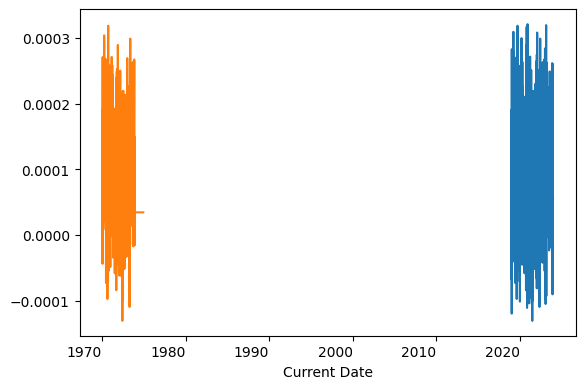

In [495]:
# Split data into training and testing sets
train_size = int(len(kandy_df) * 0.8)
train_data, test_data = kandy_df[0:train_size], kandy_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1800)
print(model_fit.summary())

kandy_df["HCHO reading"].plot()
forecast.plot()
forecast

In [496]:
colombo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1788 entries, 2019-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO reading  1788 non-null   float64
 1   Location      1788 non-null   object 
dtypes: float64(1), object(1)
memory usage: 41.9+ KB


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: xtol. After release 0.14, this will raise.
  warnings.warn(


         Current function value: -7.998595
         Iterations: 17
         Function evaluations: 90
         Gradient evaluations: 80
1788    0.000144
1789    0.000205
1790    0.000208
1791    0.000176
1792    0.000124
          ...   
1883    0.000164
1884    0.000183
1885    0.000226
1886    0.000230
1887    0.000201
Name: predicted_mean, Length: 100, dtype: float64


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Current Date'>

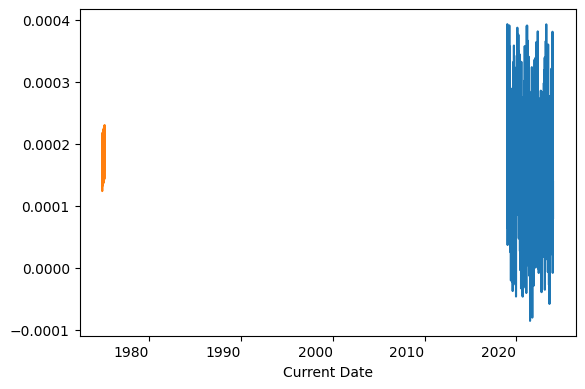

In [497]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# # Fit the SARIMA model
# sarima_model = SARIMAX(colombo_array, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# sarima_result = sarima_model.fit()
# forecast_steps = 30
# forecast = sarima_result.forecast(steps= forecast_steps)
# 
# colombo_df["HCHO reading"].plot()
# forecast.plot()
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model (example: assuming seasonal period of 12)
sarima_model = SARIMAX(colombo_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Adjusting optimization parameters
sarima_result = sarima_model.fit(maxiter=1000, method='bfgs', xtol=1e-6)

# Generating forecast
forecast = sarima_result.forecast(steps=100)
print(forecast)
colombo_df["HCHO reading"].plot()
forecast.plot()

In [498]:
forecast

1788    0.000144
1789    0.000205
1790    0.000208
1791    0.000176
1792    0.000124
          ...   
1883    0.000164
1884    0.000183
1885    0.000226
1886    0.000230
1887    0.000201
Name: predicted_mean, Length: 100, dtype: float64

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1430
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11441.412
Date:                Wed, 17 Apr 2024   AIC                         -22878.824
Time:                        21:27:21   BIC                         -22868.295
Sample:                             0   HQIC                        -22874.892
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3286   2.93e-19  -1.12e+18      0.000      -0.329      -0.329
sigma2      6.504e-09   2.02e-10     32.207      0.000    6.11e-09     6.9e-09
Ljung-Box (L1) (Q):                  10.99   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

0       0.000000
1       0.000197
2       0.000241
3       0.000152
4       0.000173
          ...   
1796    0.000212
1797    0.000212
1798    0.000212
1799    0.000212
1800    0.000212
Name: predicted_mean, Length: 1801, dtype: float64

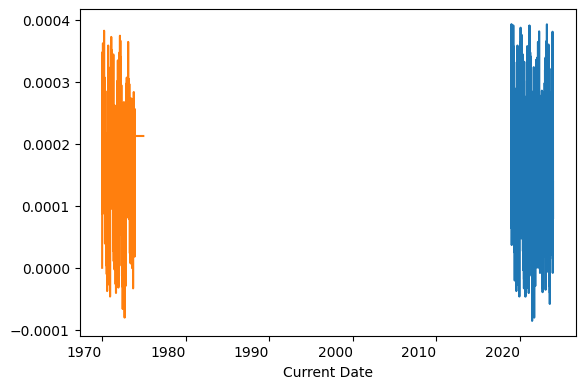

In [499]:
# Split data into training and testing sets
train_size = int(len(colombo_df) * 0.8)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1800)
print(model_fit.summary())

colombo_df["HCHO reading"].plot()
forecast.plot()
forecast

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: xtol. After release 0.14, this will raise.
  warnings.warn(


         Current function value: -8.036066
         Iterations: 11
         Function evaluations: 92
         Gradient evaluations: 80
1785    3.234453e-05
1786    6.255765e-05
1787    5.325125e-05
1788    6.707382e-05
1789    6.923331e-05
1790    6.490670e-05
1791    6.152291e-05
1792   -3.239362e-06
1793   -8.316596e-07
1794    9.183524e-06
1795    2.912956e-05
1796    3.354996e-05
1797    2.019296e-05
1798    4.520211e-05
1799    4.794310e-05
1800    5.971191e-05
1801    5.127938e-05
1802    4.718934e-05
1803    4.404284e-05
1804   -1.518473e-05
1805   -1.299179e-05
1806   -3.838981e-06
1807    1.439473e-05
1808    1.843543e-05
1809    6.304861e-06
1810    3.176035e-05
1811    3.346784e-05
1812    4.541281e-05
1813    3.788890e-05
1814    3.377857e-05
Name: predicted_mean, dtype: float64


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Current Date'>

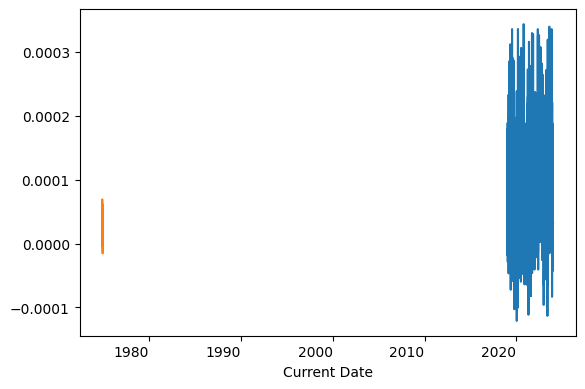

In [500]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model (example: assuming seasonal period of 12)
sarima_model = SARIMAX(bibile_df["HCHO reading"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Adjusting optimization parameters
sarima_result = sarima_model.fit(maxiter=1000, method='bfgs', xtol=1e-6)

# Generating forecast
forecast = sarima_result.forecast(steps=30)
print(forecast)
bibile_df["HCHO reading"].plot()
forecast.plot()

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1428
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11511.885
Date:                Wed, 17 Apr 2024   AIC                         -23019.770
Time:                        21:27:26   BIC                         -23009.243
Sample:                             0   HQIC                        -23015.839
                               - 1428                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3495   3.78e-19  -9.26e+17      0.000      -0.349      -0.349
sigma2      5.752e-09    1.6e-10     35.946      0.000    5.44e-09    6.07e-09
Ljung-Box (L1) (Q):                   9.31   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Current Date
2019-01-01    0.000000
2019-01-02    0.000019
2019-01-03    0.000019
2019-01-04    0.000025
2019-01-05    0.000034
                ...   
2022-12-29    0.000069
2022-12-30    0.000012
2023-01-01    0.000059
2023-01-02    0.000115
2023-01-03    0.000002
Name: predicted_mean, Length: 1428, dtype: float64

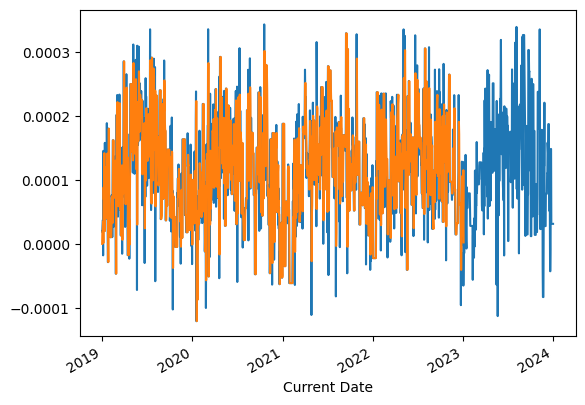

In [501]:
# Split data into training and testing sets
train_size = int(len(bibile_df) * 0.8)
train_data, test_data = bibile_df[0:train_size], bibile_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0)
print(model_fit.summary())

bibile_df["HCHO reading"].plot()
forecast.plot()
forecast

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1427
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11743.591
Date:                Wed, 17 Apr 2024   AIC                         -23483.182
Time:                        21:27:26   BIC                         -23472.657
Sample:                             0   HQIC                        -23479.251
                               - 1427                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2414   2.92e-19  -8.27e+17      0.000      -0.241      -0.241
sigma2       3.76e-09   8.46e-11     44.441      0.000    3.59e-09    3.93e-09
Ljung-Box (L1) (Q):                   1.89   Jarque-

Current Date
2019-01-01    0.000000
2019-01-02    0.000191
2019-01-03    0.000191
2019-01-04    0.000191
2019-01-05    0.000086
                ...   
2022-12-15    0.000021
2022-12-16    0.000021
2022-12-17    0.000021
2022-12-18    0.000021
2022-12-19    0.000021
Name: predicted_mean, Length: 1427, dtype: float64

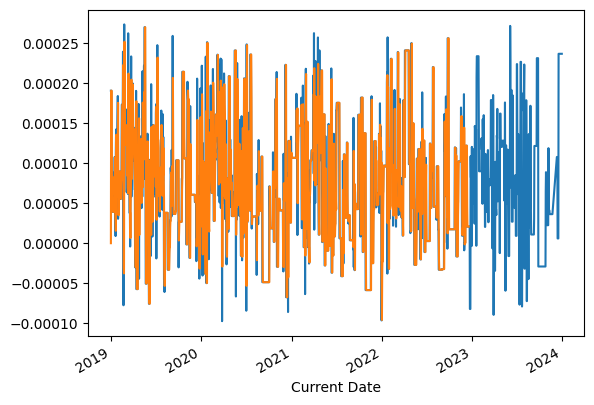

In [502]:
# Split data into training and testing sets
train_size = int(len(nuwaraEliya_df) * 0.8)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0)
print(model_fit.summary())

nuwaraEliya_df["HCHO reading"].plot()
forecast.plot()
forecast

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1408
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11522.934
Date:                Wed, 17 Apr 2024   AIC                         -23041.869
Time:                        21:27:26   BIC                         -23031.371
Sample:                             0   HQIC                        -23037.945
                               - 1408                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2848   1.65e-19  -1.72e+18      0.000      -0.285      -0.285
sigma2      4.511e-09    1.3e-10     34.580      0.000    4.26e-09    4.77e-09
Ljung-Box (L1) (Q):                   7.58   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

Current Date
2019-01-01    0.000000
2019-01-02    0.000006
2019-01-03    0.000006
2019-01-04    0.000171
2019-01-05    0.000113
                ...   
2022-12-28    0.000138
2022-12-29    0.000173
2022-12-30    0.000054
2023-01-01   -0.000025
2023-01-02    0.000041
Name: predicted_mean, Length: 1408, dtype: float64

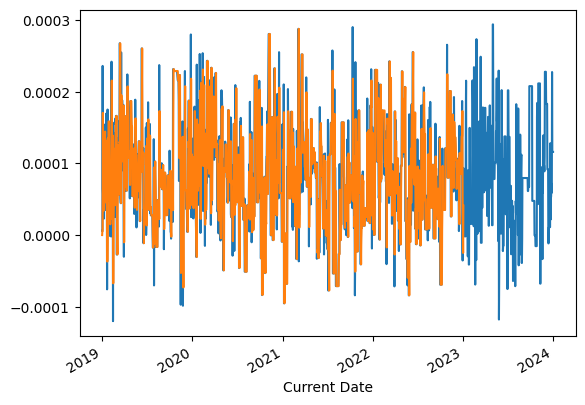

In [503]:
# Split data into training and testing sets
train_size = int(len(deniyaya_df) * 0.8)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start = 0)
print(model_fit.summary())

a = deniyaya_df["HCHO reading"]
a.plot()
forecast.plot()
forecast

In [504]:
deniyaya_df

,HCHO reading,Location
Current Date,,
2019-01-01,0.000006,"Deniyaya, Matara"
2019-01-02,0.000006,"Deniyaya, Matara"
2019-01-03,0.000236,"Deniyaya, Matara"
2019-01-04,0.000064,"Deniyaya, Matara"
2019-01-05,0.000053,"Deniyaya, Matara"
...,...,...
2023-12-27,0.000228,"Deniyaya, Matara"
2023-12-28,0.000116,"Deniyaya, Matara"
2023-12-29,0.000116,"Deniyaya, Matara"


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1420
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11514.936
Date:                Wed, 17 Apr 2024   AIC                         -23025.872
Time:                        21:27:27   BIC                         -23015.357
Sample:                             0   HQIC                        -23021.944
                               - 1420                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3597   2.05e-19  -1.76e+18      0.000      -0.360      -0.360
sigma2      5.239e-09   1.65e-10     31.831      0.000    4.92e-09    5.56e-09
Ljung-Box (L1) (Q):                  13.76   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

0       0.000000
1       0.000088
2       0.000119
3       0.000144
4       0.000052
          ...   
1846    0.000018
1847    0.000018
1848    0.000018
1849    0.000018
1850    0.000018
Name: predicted_mean, Length: 1851, dtype: float64

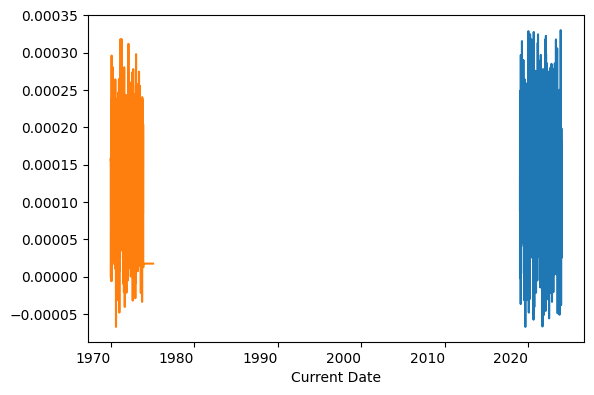

In [505]:
# Split data into training and testing sets
train_size = int(len(kurunegala_df) * 0.8)
train_data, test_data = kurunegala_df[0:train_size], kurunegala_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1850)
print(model_fit.summary())

kurunegala_df["HCHO reading"].plot()
forecast.plot()
forecast

In [506]:
kurunegala_df

,HCHO reading,Location
Current Date,,
2019-01-01,0.000088,Kurunegala Proper
2019-01-02,0.000137,Kurunegala Proper
2019-01-03,0.000148,Kurunegala Proper
2019-01-04,-0.000002,Kurunegala Proper
2019-01-05,0.000249,Kurunegala Proper
...,...,...
2023-12-27,0.000075,Kurunegala Proper
2023-12-28,0.000158,Kurunegala Proper
2023-12-29,0.000158,Kurunegala Proper


In [507]:
jaffna_df.shape

(1752, 2)

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1401
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11510.458
Date:                Wed, 17 Apr 2024   AIC                         -23016.917
Time:                        21:27:27   BIC                         -23006.428
Sample:                             0   HQIC                        -23012.996
                               - 1401                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4036   1.16e-19  -3.47e+18      0.000      -0.404      -0.404
sigma2       4.23e-09   1.55e-10     27.240      0.000    3.93e-09    4.53e-09
Ljung-Box (L1) (Q):                  14.06   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

0       0.000000
1       0.000058
2       0.000084
3       0.000065
4       0.000014
          ...   
1806    0.000111
1807    0.000111
1808    0.000111
1809    0.000111
1810    0.000111
Name: predicted_mean, Length: 1811, dtype: float64

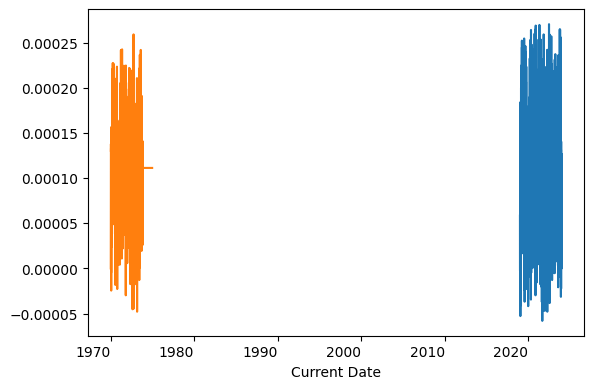

In [508]:
# Split data into training and testing sets
train_size = int(len(jaffna_df) * 0.8)
train_data, test_data = jaffna_df[0:train_size], jaffna_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0, end= 1810)
print(model_fit.summary())

# jaffna_df["HCHO reading"].plot()
jaffna_df["HCHO reading"].plot()
forecast.plot()
forecast

In [509]:
forecast.shape

(1811,)